<a href="https://colab.research.google.com/github/Pls-David-Now-is-not-the-time/IC24-Data-Analytics-USDA/blob/main/EthanIC24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

data_dictionary = pd.read_csv("/content/sample_data/02 Data Dictionary.csv")
ff_sr = pd.read_csv("/content/sample_data/FF_SR_ data.csv")
food_cat_id = pd.read_csv("/content/sample_data/food_category_id table.csv")
nutrient_id = pd.read_csv("/content/sample_data/nutrient_id table.csv")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# dropping duplicate international units
ff_sr = ff_sr.drop_duplicates(["FF Food description", "FF_Component"])

In [154]:
net_pos = ff_sr[["FF_NDB", "SR_NDB", "SR Food description", "Nutrient_id", "unit_name", "FF Mean per 100g", "SR Mean per 100g", "FF_Component", "food_category_id"]]

net_pos['diff'] = net_pos["FF Mean per 100g"] - net_pos["SR Mean per 100g"]
net_pos['percent_change'] = (net_pos['diff'] / net_pos["SR Mean per 100g"]) * 100
net_pos['percent_change'] = net_pos['percent_change'].fillna(0)

# rows sorted by percent change of mean per 100g from SR to FF (lowest to highest)
net_pos_sorted = net_pos.sort_values(by="percent_change")
net_pos_sorted.head()

<ipython-input-154-4150e6bd654e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['diff'] = net_pos["FF Mean per 100g"] - net_pos["SR Mean per 100g"]
<ipython-input-154-4150e6bd654e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['percent_change'] = (net_pos['diff'] / net_pos["SR Mean per 100g"]) * 100
<ipython-input-154-4150e6bd654e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,FF_NDB,SR_NDB,SR Food description,Nutrient_id,unit_name,FF Mean per 100g,SR Mean per 100g,FF_Component,food_category_id,diff,percent_change
1222,1079,1079,"Milk, reduced fat, fluid, 2% milkfat, with added vitamin A and vitamin D",1010,G,0.0,0.010,Sucrose,1,-0.010,-100.0
4113,10224,10224,"Pork, fresh, loin, top loin (roasts), boneless, separable lean and fat, raw",1101,MG,0.0,0.007,"Manganese, Mn",10,-0.007,-100.0
172,1173,1173,"Egg, white, dried",1089,MG,0.0,0.150,"Iron, Fe",1,-0.150,-100.0
2075,9500,9500,"Apples, raw, red delicious, with skin",1093,MG,0.0,1.000,"Sodium, Na",9,-1.000,-100.0
2076,9500,9500,"Apples, raw, red delicious, with skin",1089,MG,0.0,0.110,"Iron, Fe",9,-0.110,-100.0


In [155]:
#number of unique food items
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
ff_sr['FF Food description'].nunique()

158

Net change

In [156]:
# initial info
initial_info = net_pos[['FF_NDB', 'SR_NDB', 'SR Food description', 'Nutrient_id', 'unit_name', 'FF Mean per 100g', 'SR Mean per 100g', 'FF_Component', 'food_category_id', 'diff']]

initial_info['diff'] = initial_info['FF Mean per 100g'] - initial_info['SR Mean per 100g']
initial_info['percent_change'] = (initial_info['diff'] / initial_info['SR Mean per 100g']) * 100

# category with largest amount of overall negative change
largest_negative_change_category = initial_info.groupby('food_category_id')['diff'].sum().idxmin()

# category with largest amount of overall positive change
largest_positive_change_category = initial_info.groupby('food_category_id')['diff'].sum().idxmax()

# category with largest amount of no change
no_change_category = initial_info[initial_info['diff'] == 0]
largest_no_change_category = no_change_category['food_category_id'].value_counts().idxmax()

# category with largest amount of change from a base of 0
change_from_0_category = initial_info[initial_info['SR Mean per 100g'] == 0]
largest_change_from_0_category = change_from_0_category['food_category_id'].value_counts().idxmax()

# category with largest amount of change to 0
change_to_0_category = initial_info[initial_info['FF Mean per 100g'] == 0]
largest_change_to_0_category = change_to_0_category['food_category_id'].value_counts().idxmax()

print("Category with largest amount of overall negative change:", largest_negative_change_category)
print("Category with largest amount of overall positive change:", largest_positive_change_category)
print("Category with largest amount of no change:", largest_no_change_category)
print("Category with largest amount of change from a base of 0:", largest_change_from_0_category)
print("Category with largest amount of change to 0:", largest_change_to_0_category)


Category with largest amount of overall negative change: 11
Category with largest amount of overall positive change: 18
Category with largest amount of no change: 1
Category with largest amount of change from a base of 0: 1
Category with largest amount of change to 0: 1


<ipython-input-156-b21713ba42d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_info['diff'] = initial_info['FF Mean per 100g'] - initial_info['SR Mean per 100g']


Count comparison

In [157]:
# dictionaries to store counts for each category
positive_changes = {}
negative_changes = {}
no_changes = {}
changes_from_0 = {}
changes_to_0 = {}

# going from category 1 to 25
for category_id in range(1, 26):
    # filtering for curr catogry
    category_data = net_pos[net_pos['food_category_id'] == category_id]

    # count and store num of times for each type of change
    positive_changes[category_id] = (category_data['diff'] > 0).sum()
    negative_changes[category_id] = (category_data['diff'] < 0).sum()
    no_changes[category_id] = (category_data['diff'] == 0).sum()
    changes_from_0[category_id] = ((category_data['SR Mean per 100g'] == 0) & (category_data['FF Mean per 100g'] > 0)).sum()
    changes_to_0[category_id] = ((category_data['FF Mean per 100g'] == 0) & (category_data['SR Mean per 100g'] > 0)).sum()

for category_id in range(1, 26):
    print(f"Category {category_id}:")
    print(f"Positive changes: {positive_changes[category_id]}")
    print(f"Negative changes: {negative_changes[category_id]}")
    print(f"No changes: {no_changes[category_id]}")
    print(f"Changes from 0: {changes_from_0[category_id]}")
    print(f"Changes to 0: {changes_to_0[category_id]}")
    print()


Category 1:
Positive changes: 502
Negative changes: 598
No changes: 229
Changes from 0: 18
Changes to 0: 80

Category 2:
Positive changes: 39
Negative changes: 22
No changes: 17
Changes from 0: 2
Changes to 0: 4

Category 3:
Positive changes: 0
Negative changes: 0
No changes: 0
Changes from 0: 0
Changes to 0: 0

Category 4:
Positive changes: 26
Negative changes: 35
No changes: 2
Changes from 0: 5
Changes to 0: 5

Category 5:
Positive changes: 27
Negative changes: 46
No changes: 3
Changes from 0: 0
Changes to 0: 3

Category 6:
Positive changes: 0
Negative changes: 0
No changes: 0
Changes from 0: 0
Changes to 0: 0

Category 7:
Positive changes: 61
Negative changes: 82
No changes: 9
Changes from 0: 4
Changes to 0: 4

Category 8:
Positive changes: 0
Negative changes: 0
No changes: 0
Changes from 0: 0
Changes to 0: 0

Category 9:
Positive changes: 168
Negative changes: 295
No changes: 87
Changes from 0: 4
Changes to 0: 28

Category 10:
Positive changes: 18
Negative changes: 35
No changes: 3

In [158]:
# most positive changes
best_positive_changes_category = max(positive_changes, key=positive_changes.get)

# most negative changes
best_negative_changes_category = max(negative_changes, key=negative_changes.get)

# most no changes
best_no_changes_category = max(no_changes, key=no_changes.get)

# most changes from 0
best_changes_from_0_category = max(changes_from_0, key=changes_from_0.get)

# most changes to 0
best_changes_to_0_category = max(changes_to_0, key=changes_to_0.get)

print("Category with the most positive changes:", best_positive_changes_category)
print("Category with the most negative changes:", best_negative_changes_category)
print("Category with the most no changes:", best_no_changes_category)
print("Category with the most changes from 0:", best_changes_from_0_category)
print("Category with the most changes to 0:", best_changes_to_0_category)


Category with the most positive changes: 1
Category with the most negative changes: 1
Category with the most no changes: 1
Category with the most changes from 0: 1
Category with the most changes to 0: 1


Within each of said category, collapsing nutritional components together and counting more detailed occurences per type of change, for each specific food item.
1, 9, 11, 12, 16, 20

Ex: in category 1 (Dairy and Egg Products), eggs would be “Egg” but within, specifically indicate occurrence count of various changes, do this for everything for the table categories listed.


In [179]:
#getting 100+ change categories
specified_categories = [1, 9, 11, 12, 16, 20]
specified_net_pos = net_pos[net_pos['food_category_id'].isin(specified_categories)]

# getting common first words for new grouping, this collapses common food items into one
specified_net_pos['Food Item'] = specified_net_pos['SR Food description'].str.split(',').str[0]
#print(specified_net_pos.head(10))#, made by gpt to check since for some reason specified_net_pos.head() failed

# gathering all the info together and calculating them
# agg method used to apply calculations of each types of change to df
grouped_data = specified_net_pos.groupby(['food_category_id', 'Food Item']).agg( #https://www.w3schools.com/python/pandas/ref_df_agg.asp
    Positive_Changes=('diff', lambda x: (x > 0).sum()), #calculates the number of elements in the column that are greater than 0 and sums them
    Negative_Changes=('diff', lambda x: (x < 0).sum()), #same as above but for < 0
    No_Changes=('diff', lambda x: (x == 0).sum()),      #same as above but for = 0
    #compares each instance of "SR Mean per 100g" that is 0 with each instance of values >0 in "FF Mean per 100g" to determine whether the current values (FF) rose from a orignal value of 0/nothing (SR)
    Changes_From_0=('SR Mean per 100g', lambda x: ((x == 0) & (x.shift(-1) > 0)).sum()),
    #compares each instance of "FF Mean per 100g"  that is 0/nothing with each instance of values >0 in  "SR Mean per 100g" to determine whether the current values (FF) fell from a orignal value of >0 (SR)
    Changes_To_0=('FF Mean per 100g', lambda x: ((x == 0) & (x.shift(1) > 0)).sum()),
    Percent_Change=('percent_change', 'mean') #prev alr calculated in net pos, just pulling from there
).reset_index() #resets index of final df

# df for everything
print(grouped_data)


<ipython-input-179-ba04df054d26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specified_net_pos['Food Item'] = specified_net_pos['SR Food description'].str.split(',').str[0].str.strip().str.lower()


    food_category_id                  Food Item  Positive_Changes  \
0                  1                     butter                18   
1                  1                     cheese               158   
2                  1             cheese product                13   
3                  1                      cream                22   
4                  1                        egg                94   
5                  1                       milk               131   
6                  1                     yogurt                66   
7                  9                apple juice                 8   
8                  9                     apples                37   
9                  9                 applesauce                12   
10                 9                    bananas                10   
11                 9                blueberries                 7   
12                 9                   cherries                10   
13                 9            cr

In [160]:
#confirming row counts to ensure num of unique foods is same
print("Row count of summarized_df:", grouped_data.shape[0]) #row count of final df

#row count of collasped unique food items
print("Count of collapsed unique food items:", specified_net_pos.groupby('Food Item').size().count())

Row count of summarized_df: 59
Count of collapsed unique food items: 58


In [180]:
#entirely gpt done to make a pretty and easy to read table
from tabulate import tabulate

# Convert summarized_df to a table format
table = tabulate(
    grouped_data,
    headers='keys',  # Use column names as headers
    tablefmt='pretty',  # Use 'pretty' formatting
    showindex=False  # Do not show row indices
)

# Print the table
print(table)


+------------------+---------------------------+------------------+------------------+------------+----------------+--------------+----------------------+
| food_category_id |         Food Item         | Positive_Changes | Negative_Changes | No_Changes | Changes_From_0 | Changes_To_0 |    Percent_Change    |
+------------------+---------------------------+------------------+------------------+------------+----------------+--------------+----------------------+
|        1         |          butter           |        18        |        46        |     8      |       8        |      11      |         nan          |
|        1         |          cheese           |       158        |       228        |     85     |       41       |      61      |         nan          |
|        1         |      cheese product       |        13        |        12        |     1      |       1        |      2       | -6.4720423149635185  |
|        1         |           cream           |        22        |   

In [162]:
# checking to see if any food cat ids out of bounds
out_of_bounds = ff_sr[(ff_sr['food_category_id'] < 1) | (ff_sr['food_category_id'] > 25)]

# Print any rows with out-of-bounds values
if not out_of_bounds.empty:
    print("some out of bounds")
else:
    print("No out-of-bounds values found in 'food_category_id'.")

No out-of-bounds values found in 'food_category_id'.


In [163]:
#identifies all present food cat ids
print(sorted(ff_sr['food_category_id'].unique()))
#3, 6, 8, 15, 17, 19, 21, 22, 23, 24, 25 are missing categories

[1, 2, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 18, 20]


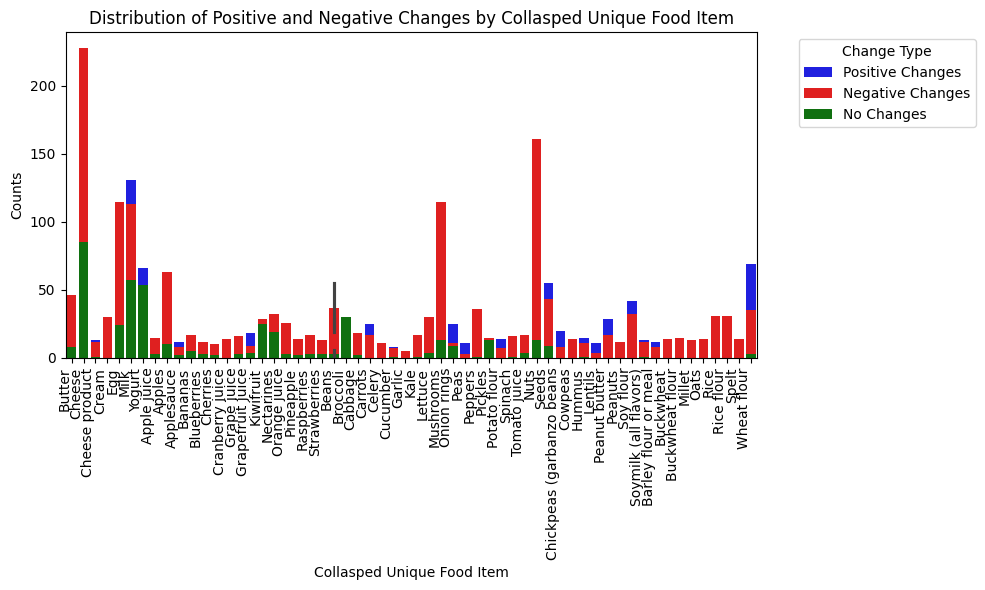

In [165]:
# Stacked Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Food Item', y='Positive_Changes', data=grouped_data, color='blue', label='Positive Changes')
sns.barplot(x='Food Item', y='Negative_Changes', data=grouped_data, color='red', label='Negative Changes')
sns.barplot(x='Food Item', y='No_Changes', data=grouped_data, color='green', label='No Changes')

plt.title('Distribution of Positive and Negative Changes by Collasped Unique Food Item')
plt.xlabel('Collasped Unique Food Item')
plt.ylabel('Counts')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Change Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # prevents overlap
plt.show()
# this depcits instances of loss, not amount/severity of loss (net change)

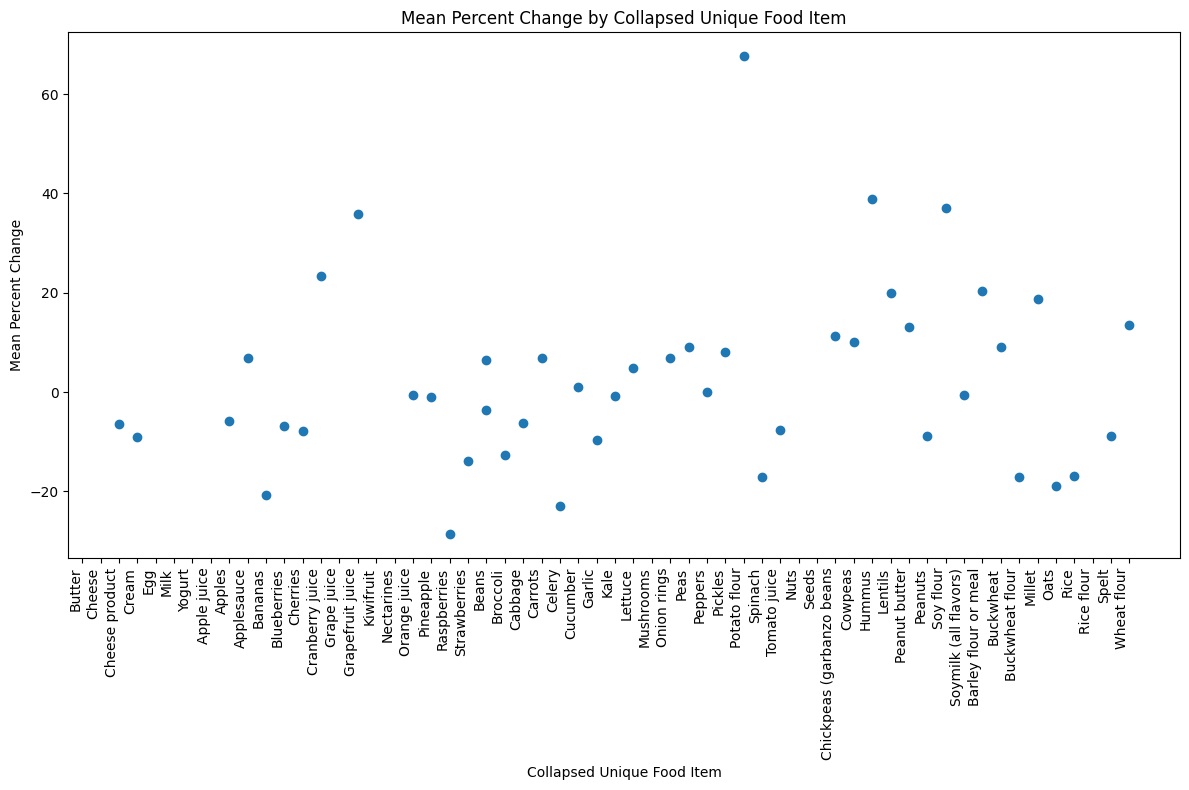

In [172]:
# Scatter Plot for Mean Percent Change
plt.figure(figsize=(12, 8))

plt.scatter(grouped_data['Food Item'], grouped_data['Percent_Change'])


plt.title('Mean Percent Change by Collapsed Unique Food Item')
plt.xlabel('Collapsed Unique Food Item')
plt.ylabel('Mean Percent Change')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  # prevents overlap
plt.show()
